# ネイピア数を底に取る対数関数と指数関数が基準だという気づき

まず思ったことはきっと以下のことが言えるのではないかということです。

> ネイピア数を底に取る対数関数（自然対数$ln(x)$）は、他の底を取る対数関数の基準になっている。

> 同様に、ネイピア数が底の指数関数（自然指数関数$e^x$）も、他の底を取る指数関数の基準になっている。

実際、例えば底が10の対数関数は「$ln(x)$を$ln(10)$で割ったもの」であるし、

$$
log_{10}(x) = \frac{ln(x)}{ln(10)}
$$

底が10の指数関数は「$e^x$を$ln(10)$で変形（伸縮）したもの」です。

$$
10^x = e^{x\ln(10)}
$$

まずは対数関数について、どのように自然対数関数（底がネイピア数の対数関数）が、常用対数（底が10の対数関数）と関係しているかをグラフで可視化してみます。

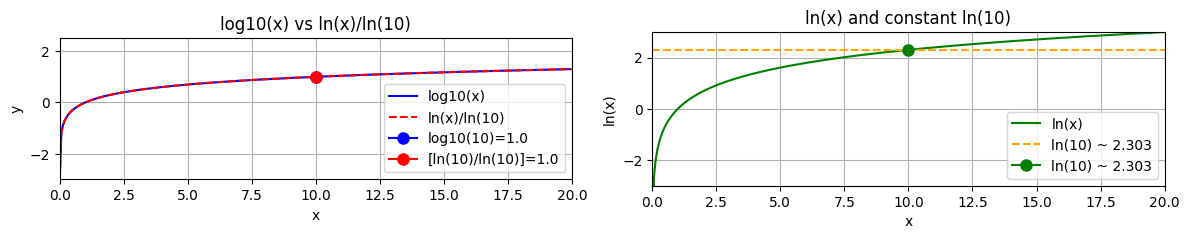

In [6]:
import sympy
import numpy as np
import matplotlib.pyplot as plt

# 1) Sympy で関数定義
x = sympy.Symbol('x', positive=True)
log10_sym = sympy.log(x, 10)                  # log10(x)
ln_over_ln10_sym = sympy.log(x)/sympy.log(10) # ln(x)/ln(10)

lnx_sym = sympy.log(x)     # ln(x)
ln10_val = float(sympy.log(10).evalf())  # ln(10)

# 2) lambdify で NumPy 関数化
f_log10 = sympy.lambdify(x, log10_sym, "numpy")
f_ln_over_ln10 = sympy.lambdify(x, ln_over_ln10_sym, "numpy")
f_lnx = sympy.lambdify(x, lnx_sym, "numpy")

# 3) 描画用データ
X = np.linspace(0.001, 20, 300)
Y_log10        = f_log10(X)
Y_ln_over_ln10 = f_ln_over_ln10(X)
Y_lnx          = f_lnx(X)

# 4) サブプロット
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# -------------------------
# 左: log10(x) vs ln(x)/ln(10)
# -------------------------
axes[0].plot(X, Y_log10, label="log10(x)", color='blue')
axes[0].plot(X, Y_ln_over_ln10, label="ln(x)/ln(10)", color='red', linestyle='--')

axes[0].set_title("log10(x) vs ln(x)/ln(10)")
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")
axes[0].set_xlim(0, 20)
axes[0].set_ylim(-3, 2.5)
axes[0].grid(True)
axes[0].legend()

# アスペクト比を1:1にする
axes[0].set_aspect('equal', 'box')

# ★ 注目点: 例として x=10 の値をマーカーで描く
x_val = 10
y_val_log10    = f_log10(x_val)         # log10(10) = 1
y_val_ln_over  = f_ln_over_ln10(x_val)  # ln(10)/ln(10) = 1

# 青い丸マーカー (log10)
axes[0].plot([x_val], [y_val_log10],
             marker='o', color='blue', markersize=8,
             label=f"log10(10)={y_val_log10}")

# 赤い丸マーカー (ln(x)/ln(10))
axes[0].plot([x_val], [y_val_ln_over],
             marker='o', color='red', markersize=8,
             label=f"[ln(10)/ln(10)]={y_val_ln_over}")

# 凡例をアップデート (注目点のラベルを追加)
axes[0].legend()

# -------------------------
# 右: ln(x) と定数 ln(10) の比較
# -------------------------
axes[1].plot(X, Y_lnx, label="ln(x)", color='green')
axes[1].axhline(y=ln10_val, color='orange', label=f"ln(10) ~ {ln10_val:.3f}", linestyle='--')

axes[1].set_title("ln(x) and constant ln(10)")
axes[1].set_xlabel("x")
axes[1].set_ylabel("ln(x)")
axes[1].set_xlim(0, 20)
axes[1].set_ylim(-3, 3)
axes[1].grid(True)
axes[1].legend()

# アスペクト比を1:1に
axes[1].set_aspect('equal', 'box')

# ★ 右側のサブプロットにも x=10 の点をマーカー表示
y_val_ln = f_lnx(x_val)  # ln(10) ~ 2.302585
axes[1].plot([x_val], [y_val_ln],
             marker='o', color='green', markersize=8,
             label=f"ln(10) ~ {y_val_ln:.3f}")
axes[1].legend()

plt.tight_layout()
plt.show()



左上のグラフは、$log_{10}(x)$のグラフと$ln(x)/ln(10)$のグラフがピッタリ同じであることから、ふたつがまったく同じであることを示しています。

青い点（隠れている）は$x=10$の時（$log_{10}(10)$）つまり「10を何乗したら10になるか」の答えなので1乗となり$y=1$になっている。赤い点は$x=10$の時$ln(10)/ln(10)$なので分母と分子が同じで$１$となり$y=1$という結果になっている。どちらのアプローチでも全ての点は同じになるはずです。

右上のグラフの曲線は自然対数関数です。左のグラフとアスペクト比を同じにしているので、$log_{10}$のグラフよりもふんわりしたカーブになっているのが分かります。このグラフの$x=10$の時（すなわち言い換えれば$ln(10)$の時）の$y$の値がおおよそ$2.303$になっていて、そこに緑色の点を置き、さらに黄色破線を水平に引いています。

$\frac{ln(x)}{ln(10)}$

の形を思い出すと、これは「緑色の曲線を、緑色の点のyの値（$ln(10)$で得られる定数）で割ったもの」と言い換えることができます。つまり、この緑色の曲線を、$ln(10)$の値（$2.303$ぐらい)で割って変形したものが$log_{10}(x)$のグラフになる、っと考えることが出来るのです。（黄色破線は定数を表していて、それぞれのxの時の「yの値」をこの定数で割る、と考えるやりかたもあります）

緑色の曲線のうち、目立った点での値を実際に$2.303$ぐらいで割ってみると、左側のグラフの曲線みたいになることが分かります。例えば$2.303$を$2.303$で割ると$１$なので、左側のグラフでは$x=10$の時$y=1$になっています。

# 底が10と底が2の対数関数と比べてみる

次に、底が2のもの自然対数考えています。ここでは「自然対数は他の対数関数の基準になる」とか「自然対数を変形したら他の対数関数になる」という直感を得ることが目的です。

底が２の対数関数と自然対数
底が10の対数関数と自然対数

の関係を視覚化します。


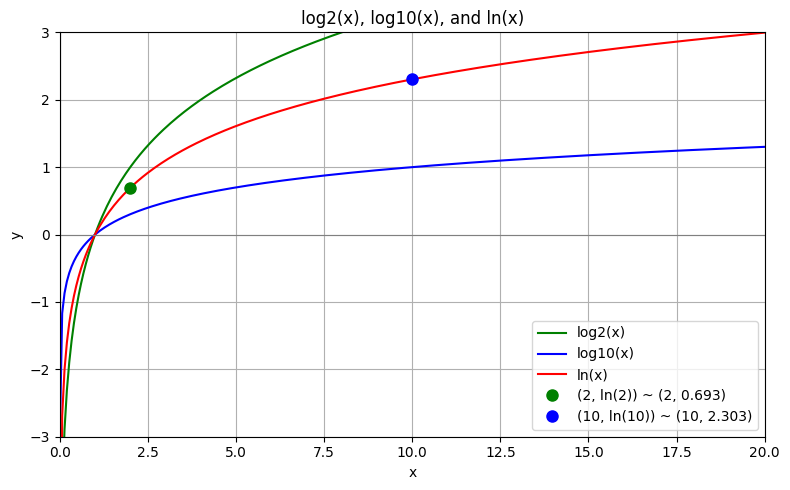

In [7]:
import sympy
import numpy as np
import matplotlib.pyplot as plt

# 1) Sympyで x>0 の記号変数を定義
x = sympy.Symbol('x', positive=True)

# 2) 底が2, 10 の対数、そして自然対数 ln(x) をシンボリックに定義
log2_sym  = sympy.log(x, 2)    # log2(x)
log10_sym = sympy.log(x, 10)   # log10(x)
ln_sym    = sympy.log(x)       # ln(x) = log(x) (自然対数)

# 3) lambdify で NumPy 関数に変換
log2_np  = sympy.lambdify(x, log2_sym,  "numpy")
log10_np = sympy.lambdify(x, log10_sym, "numpy")
ln_np    = sympy.lambdify(x, ln_sym,    "numpy")

# 4) 描画用データ
#   対数関数は x>0 なので、例として 0.001 ~ 20 の範囲を生成
X = np.linspace(0.001, 20, 300)
Y_log2  = log2_np(X)
Y_log10 = log10_np(X)
Y_ln    = ln_np(X)

# 5) Matplotlib で描画
plt.figure(figsize=(8,5))

# (A) log2(x) ⇒ 緑色
plt.plot(X, Y_log2,  color='green', label="log2(x)")

# (B) log10(x) ⇒ 青色
plt.plot(X, Y_log10, color='blue',  label="log10(x)")

# (C) ln(x) ⇒ 赤色
plt.plot(X, Y_ln,    color='red',   label="ln(x)")

# 6) ln(x) 上の注目点にマーカー (x=2, x=10)
#    - ln(2) を緑色、 ln(10) を青色で示す
x_val_1 = 2
y_val_1 = ln_np(x_val_1)   # ln(2)
plt.plot([x_val_1], [y_val_1], 'o', color='green', markersize=8,
         label=f"(2, ln(2)) ~ (2, {y_val_1:.3f})")

x_val_2 = 10
y_val_2 = ln_np(x_val_2)   # ln(10)
plt.plot([x_val_2], [y_val_2], 'o', color='blue', markersize=8,
         label=f"(10, ln(10)) ~ (10, {y_val_2:.3f})")

# 7) 軸や凡例の設定
plt.xlim(0, 20)
plt.ylim(-3, 3)        # log 関数の値域をざっくり調整
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)

plt.title("log2(x), log10(x), and ln(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


赤の曲線が、基準となる自然対数$ln(x)$のグラフです。

この赤い曲線の上に点を２つ置いています。$x=2$と$x=10$の時の点です。2と10は、$log_{2}(x)$と$log_{10}(x)$の底から来ています。

$y = ln(2)$ → は$0.693$ぐらいになります（緑点の時のy軸の値がだいたいそのぐらいです）
$y = ln(10)$ → は$2.303＄ぐらいになります（青点の時のy軸を見てみるとだいたいそのぐらいです）

もう一度、以下の式を思い出して、分母に注目します。

$\frac{ln(x)}{ln(2)}$

$\frac{ln(x)}{ln(10)}$

書き換えると

$\frac{ln(x)}{0.693}$

$\frac{ln(x)}{2.303}$

となります。上はそれぞれ$log_{2}(x)$と$log_{10}(x)$と同じことでしたから、つまり

$log_{2}(x)$は$ln(x)$を$0.693$で割ったもの

$log_{10}(x)$は$ln(x)$を$2.303$で割ったもの

と言い換えることができます。ということは赤曲線を変化させると緑曲線にも青曲線にもなるわけです。

実際に赤曲線を緑曲線にするには赤曲線のyの値を$0.693$で割るわけですが「１より小さい数で割る」時は結果は大きくなるので緑曲線は赤曲線よりも$y>0$の時は上にある（つまり大きくなる）ことが分かります。（yがマイナスの時はマイナス方向に大きくなる - 値はさらに小さくなる）

赤曲線から青曲線にするには$2.303$で割るわけですが、おおざっぱに$2$で割ると考えてみると「半分になる」ということなので、赤曲線を半分にしたら、だいたい青曲線に近くなることが分かります。

# 対数関数と同じように指数関数でもネイピア数は基準になる？

ここまでは対数関数を見てきましたが指数関数とも密接な関係があるので、指数関数についても、異なる底の指数関数（例えば$y = 2^x$や$y = 10^x$も、$y = e^x$を基準にすることが出来るはずです。

以下はそれを直観的に理解できるように、３つの関数とその関係を表しました。


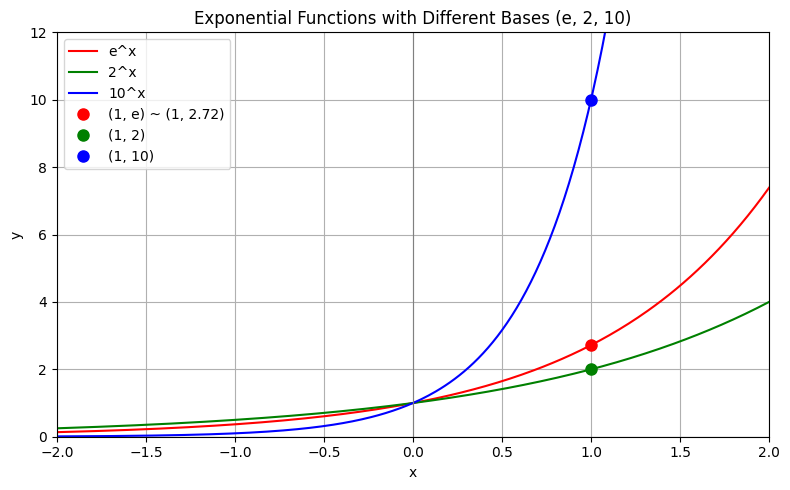

In [8]:
import sympy
import numpy as np
import matplotlib.pyplot as plt

# ================================
# 1) Sympy で変数・式を定義
# ================================
x = sympy.Symbol('x', real=True)

# "基準" の指数関数 e^x
f_e_sym = sympy.exp(x)

# 底2, 底10 の指数関数 (2^x, 10^x) もシンボリックに
f2_sym = 2**x
f10_sym = 10**x

# ================================
# 2) lambdify で NumPy 関数化
# ================================
f_e_np   = sympy.lambdify(x, f_e_sym,   "numpy")  # e^x
f_2_np   = sympy.lambdify(x, f2_sym,    "numpy")  # 2^x
f_10_np  = sympy.lambdify(x, f10_sym,   "numpy")  # 10^x

# 便利な定数として ln(2), ln(10) を取得
ln2  = float(sympy.log(2))
ln10 = float(sympy.log(10))

# ================================
# 3) 描画用データ
# ================================
# -2 ~ 2 程度で十分変化を見ることができる
X = np.linspace(-2, 2, 300)
Y_e   = f_e_np(X)      # e^x
Y_2   = f_2_np(X)      # 2^x
Y_10  = f_10_np(X)     # 10^x

# ================================
# 4) プロット
# ================================
plt.figure(figsize=(8,5))

# (A) e^x (赤)
plt.plot(X, Y_e, color='red', label="e^x")

# (B) 2^x (緑)
plt.plot(X, Y_2, color='green', label="2^x")

# (C) 10^x (青)
plt.plot(X, Y_10, color='blue', label="10^x")

# x=0, y=0 の補助線
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)

plt.xlim(-2, 2)
plt.ylim(0, 12)   # 10^2 = 100 までは大きいので適宜調整

plt.xlabel("x")
plt.ylabel("y")
plt.title("Exponential Functions with Different Bases (e, 2, 10)")
plt.grid(True)

# 4.1) 凡例
plt.legend()

# ================================
# 5) x=1 のマーカーを付ける
# ================================
x_val = 1
# e^1 = e
y_e_1  = f_e_np(x_val)   # e
# 2^1=2, 10^1=10
y_2_1  = f_2_np(x_val)
y_10_1 = f_10_np(x_val)

# 赤丸: (1, e)
plt.plot([x_val], [y_e_1], 'ro', markersize=8, 
         label=f"(1, e) ~ (1, {y_e_1:.2f})")

# 緑丸: (1, 2)
plt.plot([x_val], [y_2_1], 'go', markersize=8,
         label=f"(1, 2)")

# 青丸: (1, 10)
plt.plot([x_val], [y_10_1], 'bo', markersize=8,
         label=f"(1, 10)")

# 凡例を更新
plt.legend()

plt.tight_layout()
plt.show()


赤が基準となる$y=e^x$のグラフです。（言うまでもなく$e$は定数$2.718281828...$ ）

ここで曲線のペアを考えます。

緑と赤の関係

$$
2^x = e^{x\ln(2)}
$$

青と赤の関係

$$
10^x = e^{x\ln(10)}
$$

つまり、ある底の指数関数は$e^x$と自然対数関数から得られる定数で表すことが出来るということです。

直前の章で

- $ln(2)$は$0.693$ぐらい
- $ln(10)$は$2.303$ぐらい

だったので

$$
2^x \approx e^{(0.693...)x}
$$


$$
10^x \approx e^{(2.303...)x}
$$

ぐらいになります。

ここで上のグラフの「青点」と「緑点」を考えてみます。このふたつの点は$x=1$の時なので、

$$
e^{(0.693...)}
$$


$$
e^{(2.303...)}
$$

を計算すればよいことになります。実際に$e \approx 2.718281828...$として乗算してみると、だいたいそれぞれ$2$と$10$ぐらいの値になります。ところでこの$2.718281828...$は赤点の座標$(1, e)$なので、青点は赤点を変換したことになり、緑点も同様です。

つまり、底２や底10の指数関数は、基準となる底が$e$の指数関数をあるスケールファクターでスケール変換したもので、そのスケールファクターは自然対数$ln(x)$で得られる、と言えます。

